# Homework 1: Supervised Learning 1: Lab Questions
### 25 points total
### Version 1.0



Alexandra Szewc (aszewc1), Cassie Parent (cparent5)

---



**Instructions:**
This notebook is intended to guide you through creating and exploring your dataset. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

## Part 1: Defining the Problem and Choosing a Dataset
Things to do in this part:
1. Answer questions 1-4
2. Identify data sources to use in your dataset
3. List data sources used in question 5

Your first task is to choose a problem you're interested in. You are free to choose from any domain, but it should be within the **supervised learning** paradigm. In other words, a supervised classifier should be able to generalize from a training sample of $(X,y)$ pairs to predict outcomes on unseen data $x$. We want to use machine learning, so your problem should be difficult to solve using traditional programming algorithms. 

For simplicity, you will construct data for a binary or multiclass classification problem, where the possible labels are given by a fixed set of choices, or for a regression task (real-valued labels). Do not build a dataset for a structured prediction task.


#### 1) In one or two sentences, what are you interested in predicting given what data? This is your supervised learning problem.

You should answer this question before creating your dataset, as it will provide an indication of what to search for.

<font color='green'>
    We want to predict whether an Olympic athlete will win a medal at the Olympics given demographic information about their themselves, their sport, their home country, etc. 
</font>

#### 2) Is this a well-defined problem? Why or why not? What ambiguities (if any) exist in your problem?

Think about what challenges you solved by formulating the problem in this way.

<font color='green'>
    This is a well-defined problem as there is a clear distinction between medaling and not medaling at the Olympics. However, one challenge could be that the majority of Olympians do not medal at all. So, we will need to make sure our model does not just only predict "no" for every athlete just to get a high accuracy.
</font>

#### 3) Does an easy (non-ML) solution exist for the problem? What are existing ways this problem, or a similar problem, is addressed (regardless of difficulty)?

<font color='green'>
    Most predictions about medal-winners are made based off of previous compeitions and world standings. Favorites are also generated through looking and preliminary and qualification rounds to enter the Olympics. 
</font>

#### 4) Why is using machine learning for this problem justified?

<font color='green'>
    While current predictions are based on the athlete's previous performances, we are curious to find out if purely demographic information can also predict an athlete's success. With thousands of athletes competing at the Olympics all with different demographic information, these predictions would be extremely difficult to make without a machine learning tool.
</font>

Now, we'll turn to data we can use to actually solve your problem. You may wish to use Section 3.1 of the assignment sheet for inspiration. **Remember, you are expected to *create* a dataset, not use an existing one**.

#### 5) List the sources for all data you used when creating your dataset along with (very briefly) what you obtained from it.

For example: <br /> Obtained features information for sex, age, height, weight, year, sport, home status, team sport status, season, and medal status from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-resultsexample_data. <br /> Obtained GDP and GDP per capita data from https://data.un.org/.

<font color='green'>
    Note that the full raw data from Kaggle had data from all Olympics. Before uploading the data to our Colab, we deleted all entries before 1980. This kept our project more in the modern era. 
</font>

## Part 2: What does the data look like?
Things to do in this part:
1. Answer questions 6-11
2. Print a few examples of raw data (if possible) otherwise explain what the raw data looks like.
3. Create at least 3 numerical features from your raw data
4. Create dataset such that $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ are both numpy arrays
5. Create 1 visual that helps you understand your data.

Let's take a look at the various data you've collected. First let's read in the raw data. You may read the data into whatever is most convenient (e.g. a list, a numpy array, a Pandas dataframe, etc.). **At this point your data will be in whatever format you downloaded them in**. For example, if you're working with text data, your data might be strings of words or collection of text documents. If you are working with image data, you might have a collection of images.
<br /><br />
For those of you new to working with data in Python, we have included examples of how to import the raw data. These are merely suggestions if they work for you. You don't have to use them.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import math

In [2]:
# Mount Google drive for data access
try:
    # Executes if running in Google Colab
    from google.colab import drive
    drive.mount('gdrive/')
    # DATAPATH = "gdrive/My Drive/ML HW1 Data" # Change path to location of data if necessary
    DATAPATH = "gdrive/My Drive/Programming/ML/Homework 1"
except:
    # Executes if running locally (e.g. Anaconda)
    DATAPATH = "./"

Drive already mounted at gdrive/; to attempt to forcibly remount, call drive.mount("gdrive/", force_remount=True).


In [3]:
# Load in raw data
gdp_data = pd.read_csv('/'.join((DATAPATH,'gdp_data2.csv')), encoding = "ISO-8859-1")
athlete_data = pd.read_csv('/'.join((DATAPATH,'athlete_events_1980_on.csv')), encoding = "ISO-8859-1")
country_data = pd.read_csv('/'.join((DATAPATH,'noc_regions.csv')), encoding = "ISO-8859-1")

# set labels as Medal column -> will need to make numeric later
y = athlete_data.Medal 
# set athlete data --> will need to incorporate gdp data later
x = athlete_data.drop("Medal", axis = 1)

Now, let's print a few examples. Depending on your data format, you may have to write this yourself. We have provided some examples below.

In [4]:
# print out what a few examples of your raw data.
pd.set_option('display.max_columns', None)
print(x.head())
print(y.head())
print(country_data.head())
print(gdp_data.head())

    ID                                      Name Sex   Age  Height  Weight  \
0   11                        Jorma Ilmari Aalto   M  22.0   182.0    76.5   
1   85                   Alejandro Abascal Garca   M  28.0   181.0    82.0   
2   86                   Jos Manuel Abascal Gmez   M  22.0   182.0    67.0   
3   88  Nunu Dzhansuhivna Abashydze (-Myslaieva)   F  25.0   168.0   105.0   
4  108                        Giuseppe Abbagnale   M  20.0   187.0    97.0   

           Team  NOC        Games  Year  Season         City  \
0       Finland  FIN  1980 Winter  1980  Winter  Lake Placid   
1         Spain  ESP  1980 Summer  1980  Summer       Moskva   
2         Spain  ESP  1980 Summer  1980  Summer       Moskva   
3  Soviet Union  URS  1980 Summer  1980  Summer       Moskva   
4         Italy  ITA  1980 Summer  1980  Summer       Moskva   

                  Sport                                        Event  
0  Cross Country Skiing     Cross Country Skiing Men's 30 kilometres  
1   

#### (Optional) If your raw data format can't be displayed in a Jupyter notebook (e.g. video or audio files), you may skip the above step. You should still look at the raw data in whatever way possibly, but instead just describe what the raw data is that you look at.

<font color='green'>
    N/A
</font>

#### 6) What information is contained in each example (row) in $X$? These are your raw data features.

In [5]:
print(x.columns)
print(gdp_data.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event'],
      dtype='object')
Index(['code', 'Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source'], dtype='object')


<font color='green'>
    Each row as a number identifier, name, sex, age, height, weight, team, country identifier, country of origin, specific olympic games, year, season (winter or summer), city of origin, sport, and event. We  plan on adding GDP and GDP per capita as features in the dataset from our second dataset. We will also drop id, name, team country identifier, country of origin, specific olympic games, city of origin, sport, and event from the dataset as they are textual inputs with no clear numeric translation.
</font>

If your data is not numerical, this will be difficult for an algorithm to learn directly. So, now that you've seen what the raw data looks like, you will start extracting *numerical* features from the raw data.
<br /><br />
We obtain features through a process called **feature engineering**. Features may be derived from the existing raw data or may come from other data sources that can be associated with each example. This is a challenging task that often requires domain knowledge about the problem you are trying to solve. 
<br /><br />
While very important in dataset creation, feature engineering is not the focus of this assignment. You will need some features for the other steps, but these can be very simple and don't need to rely on domain knowledge.
<br /><br />
**You will need to add at least 3 features to your dataset**. If your data is Wikipedia documents, possible features could be number of sentences, word count, the words that appear in the article, number of document revisions, number of contributing authors, number of references, etc. Notice that some of these features could be derived from the raw data (i.e. the words) while others may need to be downloaded separately (i.e. page metadata). If your data are cat images, your features could be focus measure (i.e. blurriness/sharpness) using OpenCV Variance of Laplacian, whether image is grayscale, number of pixels, the pixel color values, etc.
<br /><br />
You are free to obtain features in any way you like as long as you can justify why the features your propose should help solve the problem you've defined.
<br /><br />
We'll provide some examples of what we're looking for. We are not expecting anything fancy for this step.

In [6]:
### EXAMPLE ###
# # If you're using text data stored in a dictionary (like example above):
# # Suppose each document is a string that contains a period
# # and are trying to predict end of sentences (EOS),
# import re
# import pandas as pd
# from collections import defaultdict

# # Convert X from doc_id -> text to doc_id -> {sentence, features}
# X = {k:{'sentence': v, 'features': None} for k,v in X.items()}

# # suppose you downloaded these external data: common abbreviations, titles (e.g. mr, ms, dr), month abbreviations (e.g. sept, oct)
# abbrevs = pd.read_csv('common_abbrevs.csv')
# titles = pd.read_csv('titles.csv')
# months = pd.read_csv('month_abbrevs.csv')

# # for the purpose of this example, assume all documents have len > 3
# features = defaultdict(int)
# for doc_id, doc in X.items():
#     idx = re.find('.')
#     one_before = doc['sentence'][idx - 1] if idx > 0 else None
#     one_after = doc['sentence'][idx + 1] if idx < len(doc['sentence']) - 1 else None
#     features['is_abbrev'] = 1 if one_before and one_before in abbrevs else 0
#     features['is_title'] = 1 if one_before and one_before in titles else 0
#     features['is_month'] = 1 if one_before and one_before in months else 0
#     features['is_decimal'] = 1 if one_before and one_after in one_before.isdigit() and one_after.isdigit() else 0
#     features['other_punc'] = 1 if any((p in '?!.') for c in doc['sentence'][idx:]) else 0
#     features['period_loc'] = idx
#     X[doc_id]['features'] = features
# # In just a few lines of Python, we created 6 features!

### END EXAMPLE ###

In [7]:
print(x.columns)
print(gdp_data.columns)

# np.unique(x['NOC'])
np.unique(x['Games'])
# np.unique(x['City'])
# np.unique(x['Sport'])

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event'],
      dtype='object')
Index(['code', 'Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source'], dtype='object')


array(['1980 Summer', '1980 Winter', '1984 Summer', '1984 Winter',
       '1988 Summer', '1988 Winter', '1992 Summer', '1992 Winter',
       '1994 Winter', '1996 Summer', '1998 Winter', '2000 Summer',
       '2002 Winter', '2004 Summer', '2006 Winter', '2008 Summer',
       '2010 Winter', '2012 Summer', '2014 Winter', '2016 Summer'],
      dtype=object)

In [8]:
# Organize demographic features

x = athlete_data

x['Sex'].replace(['F', 'M'],[0, 1], inplace=True)
x['Season'].replace(['Summer', 'Winter'],[0, 1], inplace=True)
x['City'].replace(['Albertville', 'Athina', 'Atlanta', 'Barcelona', 'Beijing',
       'Calgary', 'Lake Placid', 'Lillehammer', 'London', 'Los Angeles',
       'Moskva', 'Nagano', 'Rio de Janeiro', 'Salt Lake City', 'Sarajevo',
       'Seoul', 'Sochi', 'Sydney', 'Torino', 'Vancouver'],
       ['USA', 'GRE', 'USA', 'ESP', 'CHN', 'CAN', 'USA', 'NOR', 'GBR', 'USA',
        'URS', 'JPN', 'BRA', 'USA', 'BIH', 'KOR', 'RUS', 'AUS', 'ITA', 'CAN'],
        inplace=True)
x['Country'] = x['NOC']
x['Country'] = x['Country'].map(country_data.set_index('NOC')['region'])
x['Home'] = np.where(x['NOC'].eq(x['City']), '1', '0')
x['Team'] = np.where(x['Sport'].str.contains('Badminton') |
                     x['Sport'].str.contains('Baseball') |
                     x['Sport'].str.contains('Basketball') |
                     x['Sport'].str.contains('Beach Volleyball') |
                     x['Sport'].str.contains('Curling') |
                     x['Sport'].str.contains('Football') |
                     x['Sport'].str.contains('Handball') |
                     x['Sport'].str.contains('Hockey') |
                     x['Sport'].str.contains('Ice Hockey') |
                     x['Sport'].str.contains('Rowing') |
                     x['Sport'].str.contains('Rugby Sevens') |
                     x['Sport'].str.contains('Softball') |
                     x['Sport'].str.contains('Synchronized Swimming') |
                     x['Sport'].str.contains('Tennis') |
                     x['Sport'].str.contains('Volleyball') |
                     x['Sport'].str.contains('Water Polo'), 1, 0)

sport_dummies = pd.get_dummies(x.Sport)
x = pd.concat([x, sport_dummies], axis=1)

x = x.drop(columns=['Name', 'NOC', 'Games', 'City', 'Sport', 'Event'])

print(x.head())

    ID  Sex   Age  Height  Weight  Team  Year  Season Medal  Country Home  \
0   11    1  22.0   182.0    76.5     0  1980       1   NaN  Finland    0   
1   85    1  28.0   181.0    82.0     0  1980       0  Gold    Spain    0   
2   86    1  22.0   182.0    67.0     0  1980       0   NaN    Spain    0   
3   88    0  25.0   168.0   105.0     0  1980       0   NaN   Russia    1   
4  108    1  20.0   187.0    97.0     1  1980       0   NaN    Italy    0   

   Alpine Skiing  Archery  Athletics  Badminton  Baseball  Basketball  \
0              0        0          0          0         0           0   
1              0        0          0          0         0           0   
2              0        0          1          0         0           0   
3              0        0          1          0         0           0   
4              0        0          0          0         0           0   

   Beach Volleyball  Biathlon  Bobsleigh  Boxing  Canoeing  \
0                 0         0       

In [9]:
# Organize GDP features

gdp = gdp_data.drop(columns=['code', 'Footnotes', 'Source'])
gdp = gdp[(gdp['Series'].str.contains('capita') |
           gdp['Series'].str.contains('2010')) &
           (gdp['Year'] == 1995)]
gdp = gdp.drop(columns=['Year'])
metas = ['Country']
temp = gdp.set_index(['Series'] + metas).unstack('Series')
gdp = temp.Value.rename_axis([None], axis=1).reset_index()
gdp = gdp.rename(columns={'GDP in constant 2010 prices (millions of US dollars)': 'GDP', 'GDP per capita (US dollars)': 'GDP per capita'})

x = x.merge(gdp, how='inner', on=['Country'], suffixes = ('', 'UN'))
# # M = temp.groupby('Year').apply(lambda x:abs(x['Year']-x['Year_UN'])==abs(x['Year']-x['Year_UN']).min())
# # temp[M.values].drop_duplicates().drop('key',axis=1)

y = x.Medal
x['Age'].fillna(int(x['Age'].mean()), inplace=True)
x['Height'].fillna(int(x['Height'].mean()), inplace=True)
x['Weight'].fillna(int(x['Weight'].mean()), inplace=True)
x = x.drop(columns=['ID', 'Country', 'Medal'])
print(x)

        Sex   Age  Height  Weight  Team  Year  Season Home  Alpine Skiing  \
0         1  22.0   182.0    76.5     0  1980       1    0              0   
1         1  29.0   186.0    91.5     0  1980       0    0              0   
2         1  29.0   176.0    76.0     1  1980       0    0              0   
3         1  25.0   183.0    82.0     0  1980       1    0              0   
4         1  25.0   183.0    82.0     0  1980       1    0              0   
...     ...   ...     ...     ...   ...   ...     ...  ...            ...   
123294    0  25.0   162.0    52.0     0  2016       0    0              0   
123295    0  18.0   167.0    51.0     0  2016       0    0              0   
123296    0  29.0   173.0    64.0     0  2016       0    0              0   
123297    0  20.0   165.0    55.0     0  2016       0    0              0   
123298    1  26.0   194.0    88.0     0  2016       0    0              0   

        Archery  Athletics  Badminton  Baseball  Basketball  Beach Volleyba

In [10]:
# # Organize GDP features

# print(len(gdp_data.index))

# for i in range(len(gdp_data.index)):
#   if "capita" not in str(gdp_data.loc[i, "Series"]):
#     gdp_data = gdp_data.drop(i, axis = 0)

# gdp_data = gdp_data.reset_index(drop=True)
# print(gdp_data.head())

# gdp = []
# per_cap = []
# for i in range(len(x.index)):
#   diff = 100
#   curr_year = 0
#   hit = False
#   year = int(X.loc[i, "Year"])
#   for j in range(len(gdp_data.index)):
#     if X.loc[i, "Team"] == gdp_data.loc[j, "Country"]:
#       curr_diff = abs(int(X.loc[i, "Year"]) - int(gdp_data.loc[j, "Year"]))
#       if curr_diff < diff:
#         curr_year = int(gdp_data.loc[j, "Year"])
#         diff = j
#         hit = True
#     if hit == True:
#       continue
#   if hit == False:
#     X = X.drop(i, axis = 0)
#     continue
#   gdp.append(gdp_data.loc[diff, "Value"])

# X['gdp_per_capita'] = gdp
# X = X.drop(["ID, Name, Sex, Team, NOC, Games, Season, City, Sport, Event"], axis = 1)

# #want to take the "Team" match to country
# #find year that's closest to "Year"
# print(X.head())
# #######################################################

In [11]:
# Make y numeric
y.replace(['Gold', 'Silver', 'Bronze', np.nan],
                        [1, 1, 1, 0], inplace=True)

#### 7) Describe the features in your dataset.

<font color='green'>
    Athlete features include sex, age, height, weight, year of competition, whether they competed in their home country, whether they play a team sport, whether they competed in the summer or winter, their sport, their coutry's GDP from the year 1995, and their coutry's GDP per capita from the year 1995.
</font>

Next, let's focus on what you're trying to predict. First, let's see what the potential outcomes look like.

In [12]:
np.unique(y)

array([0, 1])

#### 8) Is your dataset suitable for a regression or classification task? Explain.

<font color='green'>
    Since there are two potential outcomes, and we have defined the outcome of medaling in categorical terms (either medaling or not), our dataset is suitable for a classification task between these two categories.
</font>

Now, we'll standardize our data as follows. The data matrix $X$ should be a numpy 2d array in $\mathbb{R}^{m\times n}$. The labels should be a numpy 1d array in $\mathbb{R}^m$. $m$ is the number of examples and $n$ is the number of features. **You will be training your supervised classifer on the features, which might not include all (or any) of the raw data**. This is a decision you will make when creating your dataset.
<br /><br />
Note: this is the format we're looking for your data to be in when you submit your dataset (i.e. $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ and are both numpy arrays).

In [13]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
X = np.array(x.replace(',', '', regex=True)).astype(float)
y = np.array(y)

print(X.shape)
print(y.shape)
#######################################################

(123299, 61)
(123299,)


If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [14]:
for i in np.unique(y):
    print(f'{len(y[y==i])} examples of class {i}')

108332 examples of class 0
14967 examples of class 1


#### 9) Classification: Is your dataset balanced or imbalanced?


Regression: How are your labels distributed? Normal distrbution? Uniform within a range? etc.

<font color='green'>
    Since we are performing a classification task, it is important to note that the dataset is imbalanced, since most athletes do not earn medals.
</font>

Let's compute some statistics for the dataset.

In [15]:
#######################################################
print(f'Number of examples: {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# if applicable, please include any additional dataset statistics here
print(f'Number of sparse features per example: {np.sum(np.count_nonzero(X==0, axis=0) > X.shape[0]/2)}')
print(f'Percentage NAs in dataset: {np.sum(np.isnan(X)) / (X.size)}%')
print(np.sum(np.isnan(X), axis=0))
#######################################################

Number of examples: 123299
Number of features per example: 61
Number of sparse features per example: 54
Percentage NAs in dataset: 0.0%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### 10) Do you have lots of high quality data? Explain limitations (if any) that exist in terms of data quantity and quality.

<font color='green'>
    There appears to be a large amount of high-quality data. This is because there are many features per observation, and very few NA values. However, the number of sparse features is high, since each observation only corresponds to one of many sports, which might be a potential limitation.
</font>

Data visualizations help us understand our data and draw insights. Just like there is no single ML algorithm that applies to every problem, there isn't a visualization that works for every dataset.
<br /> <br />
Instead, you will produce some visuals that you think tell an interesting story about your data. We will provide some suggestions, which you can use for inspiration. 
<br /> <br />

Types of information you may wish to capture (this is by no means comprehensive):
*   Missingness of data (consider using heat maps, scatter plots)
*   Correlation of features (consider using a correlation matrix)
*   Distribution of data (consider using historgrams, violin plots)
*   Linear separability, if you have binary classification
<br /> <br />

Check out these visualization galleries for further inspiration and example code:
*   [Seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Python Graph Gallery](https://python-graph-gallery.com/)

You should create **at least 1 visualization** for your dataset and explain what you learned about your data from it. Below is an example heatmap showing correlation of features from the sklearn iris dataset.

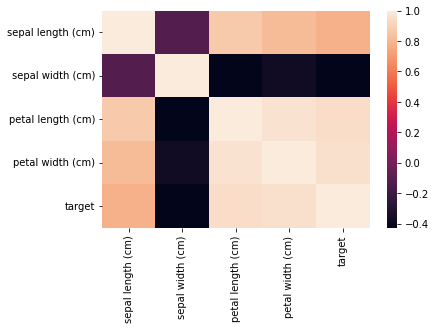

In [16]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()

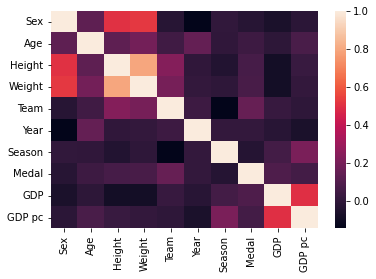

In [17]:
#######################################################
# Visualize the dataset
z = x
z['GDP'] = z['GDP'].replace(',', '', regex=True).astype(float)
z['GDP pc'] = z['GDP per capita'].replace(',', '', regex=True).astype(float)
z['Medal'] = y
w = (z[['Sex', 'Age', 'Height', 'Weight', 'Team', 'Year', 'Season', 'Medal', 'Home', 'GDP', 'GDP pc']])

sns.heatmap(w.corr(), 
            xticklabels=w.corr().columns.values,
            yticklabels=w.corr().columns.values)
plt.show()
#######################################################

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


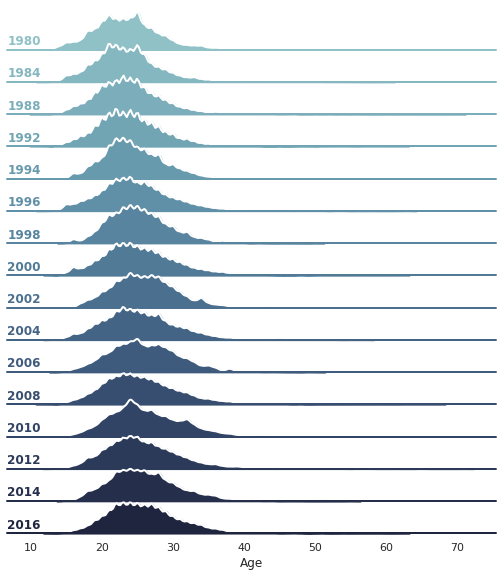

In [18]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
df = w[['Age', 'Year']]

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(16, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Year", hue="Year", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Age", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Age")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

#### 11) What insights do you gain from this visualization about your dataset?

<font color='green'>
    The dataset is not highly correlated except for basic body features such as height, weight, and sex, as well as financial information, since GDP is related to GDP per capita. The same can be said of sport designation, since each observation only represents participation in one sports (so sports cannot be related to each other).

    The second plot shows how age distribution for Olympians has not changed much over time.
</font>

## Part 3: Using your dataset

Things to do in this part:
1. Answer questions 12-13
2. Perform a train-test split
3. Train simple supervised learning algorithm on dataset

Now that you have created your dataset and explored some of its properties, you will use a supervised classifier to predict the outcome you definined in the problem statement. To evaluate how well this classifier predicts the outcomes, you will need to set some data aside for testing. First, you'll use sklearn to split the data into train and test sets, with 25% of the data reserved for testing.

In [19]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples{ {X_test.shape[0]}}')

Training examples: 92474
Testing examples{30825}


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [20]:
import numpy as np 

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

# zip together all components of your dataset
!zip homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

updating: X_train.csv (deflated 98%)
updating: X_test.csv (deflated 98%)
updating: y_train.csv (deflated 99%)
updating: y_test.csv (deflated 99%)


Now, let's train some classifiers or regression models. You are encouraged to try out multiple different algorithms, but only one is required. You are also encouraged to use popular packages such as [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model); you are not expected to implement any of these algorithms yourself. We have included sklearn's Logistic Regression and Linear Regression algorithms below as examples.
<br /><br />
Consider trying the following algorithms:
<br />
Classification: SVM, Decision Tree, Random Forest
<br />
Regression: Lasso, ridge regression

In [21]:
# If you have a classification problem, here is how to train a Logistic Regression classifier

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'Logistic Regression model accuracy is {accuracy}')

# # If you have a regression problem, here is how to train a Linear Regression classifier

# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train, y_train)
# y_hat = reg.predict(X_test)
# r_squared = reg.score(X_test, y_test)
# print(f'Goodness of fit given by coefficient of determination is {r_squared}')

#######################################################
# Train at least one simple supervised learning algorithm on your dataset

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'Random Forest model accuracy is {accuracy}')

#######################################################

Logistic Regression model accuracy is 0.879059205190592
Random Forest model accuracy is 0.905596107055961


#### 12) How can you meaningfully evaluate results?  How was the performance of your model: did it meee?
*Note:* if you trained more than one model above, you only need to answer this question for one of them.

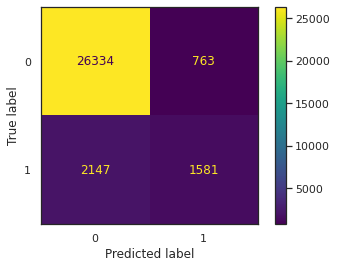

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


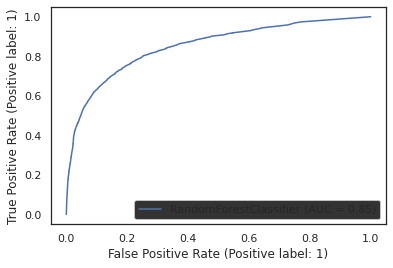

In [23]:
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

<font color='green'>
    One way to meaningfully evauate the model's results is to study the accuracy and resulting confusion matrix. From the accuracy alone, it may seem as though the Random Forest model performed quite well. In order to verify that the good performance was not due to class imbalance (resulting in frequent negative prediction) alone, a confusion matrix and ROC plot can also be generated. From these, it becomes clear that the model's performance brings some meaningful insight to the problem.
</font>

#### 13) In creating your dataset, what discussions did you have about the ethical implications of what you were collecting? Are there any potential issues with fairness?

<font color='green'>
    Throughout the creation of this dataset, my partner and I discussed the ethical implications making predictions about people based on their demographic data, and especially the significance of expecting more from certain individuals due to factors such as their country of origin and its financial standing. Taken out of context, these observations can lead to unfair conclusions about athletes based on factors beyond their control as competitors.
</font>

## Submit
Great work! You're all done.

Make sure to submit this Python notebook (as a PDF) and the dataset you created as a zip file. See the homework writeup for directions.